# Pandas introduction

This notebook is a supplementary material for the Business intelligence laboratory (VIAUMB00) course at [BME AUT](https://www.aut.bme.hu/Default.aspx). Course page in [Hungarian](https://www.aut.bme.hu/Course/VIAUMB00) and in [English](https://www.aut.bme.hu/Course/ENVIAUMB00).

The goal of this notebook is to provide a short introduction to the [Pandas](https://pandas.pydata.org/) data manipulation library.

The main problem sheet is available through Github Classroom.

You can find further information about Pandas:

1. [A 10min introduction](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Brandon Rhodes' tutorial from PyCon 2015](https://www.youtube.com/watch?v=5JnMutdy6Fw)
3. [Kevin Markham's tutorial from PyCon 2018](https://www.youtube.com/watch?v=0hsKLYfyQZc)

## What is pandas?

Pandas is a data analysis and manipulation library popular among data scientists and machine learning practitioners.

Its name is derived from _panel data_. Pandas is built to handle tabular data with mixed data types.

Pandas is integrated with Python's main numerical computation library, NumPy and with the main visualization library, matplotlib.

In [1]:
import pandas as pd  # importing it as pd is a convention you'll see everywhere
# this renders figures inside the notebook
%matplotlib inline
import matplotlib
import numpy as np

# this makes the figures a bit nicer
import seaborn as sns
sns.set_context('notebook')

In [2]:
grades = pd.DataFrame(
    {
        'subject': ['Calculus 1', 'Digital design 1', 
                    'Physics 1i', 'System modeling', 'Basics of Programming 1', 'System theory',
                   'Introduction to the Theory of Computing 1', 'Introduction to the Theory of Computing 2'],
        'grade': [3, 4, 3, 2, 5, 1, 4, 1],
        'teacher': ['A. Smith', 'J. Doe', 'J. Smith', 'M. Jackson', 'T. Swift', 'A. Grande', 'J. Bieber', 'C. Cox'],
        'semester': [1, 1, 1, 2, 1, 3, 1, 2],
        'completion_date': [
            '2017-12-18',
            '2018-01-05',
            '2018-01-21',
            '2018-06-11',
            '2018-06-01',
            '2018-12-17',
            '2017-01-01',
            '2018-01-01',
        ]
    }
)
grades['completion_date'] = pd.to_datetime(grades['completion_date'])
grades

,subject,grade,teacher,semester,completion_date
0,Calculus 1,3,A. Smith,1,2017-12-18
1,Digital design 1,4,J. Doe,1,2018-01-05
2,Physics 1i,3,J. Smith,1,2018-01-21
3,System modeling,2,M. Jackson,2,2018-06-11
4,Basics of Programming 1,5,T. Swift,1,2018-06-01
5,System theory,1,A. Grande,3,2018-12-17
6,Introduction to the Theory of Computing 1,4,J. Bieber,1,2017-01-01
7,Introduction to the Theory of Computing 2,1,C. Cox,2,2018-01-01


`.shape` is a tuple of the number of rows and the number of columns:

In [3]:
grades.shape

(8, 5)

`.head()` returns the first 5 rows of a DataFrame, `.tail()` returns the last ones. These are very useful for manual data inspection. You should always check what the contents of your dataframes.

In [4]:
grades.head()

,subject,grade,teacher,semester,completion_date
0,Calculus 1,3,A. Smith,1,2017-12-18
1,Digital design 1,4,J. Doe,1,2018-01-05
2,Physics 1i,3,J. Smith,1,2018-01-21
3,System modeling,2,M. Jackson,2,2018-06-11
4,Basics of Programming 1,5,T. Swift,1,2018-06-01


Printing other only the last two elements:

In [5]:
grades.tail(2)

,subject,grade,teacher,semester,completion_date
6,Introduction to the Theory of Computing 1,4,J. Bieber,1,2017-01-01
7,Introduction to the Theory of Computing 2,1,C. Cox,2,2018-01-01


Each of these operations return a new dataframe. We can confirm this via their object identity:

In [6]:
id(grades), id(grades.tail(2))

(139998598463376, 139997799625744)

But these objects are not copied unless we explicitly ask for a copy:

In [7]:
grades.tail(2).copy()

,subject,grade,teacher,semester,completion_date
6,Introduction to the Theory of Computing 1,4,J. Bieber,1,2017-01-01
7,Introduction to the Theory of Computing 2,1,C. Cox,2,2018-01-01


# Selecting rows, columns and cells

The first boldfaced column of the table is the index column. It's possible to use multiple columns as index (Multiindex).

## Selecting columns

In [8]:
grades['teacher']

0      A. Smith
1        J. Doe
2      J. Smith
3    M. Jackson
4      T. Swift
5     A. Grande
6     J. Bieber
7        C. Cox
Name: teacher, dtype: object

The name of the column is also exposed as an attribute as long as it adheres to the naming limitations of attributes (no spaces, starts with a letter, doesn't crash with a method name):

In [9]:
grades.teacher

0      A. Smith
1        J. Doe
2      J. Smith
3    M. Jackson
4      T. Swift
5     A. Grande
6     J. Bieber
7        C. Cox
Name: teacher, dtype: object

The type of a column is `pd.Series`, which is the type for a vector:

In [10]:
type(grades.teacher)

pandas.core.series.Series

In [11]:
grades.teacher.shape

(8,)

We can select multiple columns with a list of column names instead of a column name. Note the double square brackets.

In [12]:
grades[['grade', 'teacher']]

,grade,teacher
0,3,A. Smith
1,4,J. Doe
2,3,J. Smith
3,2,M. Jackson
4,5,T. Swift
5,1,A. Grande
6,4,J. Bieber
7,1,C. Cox


The return type of the operator `[]` depends on the type of the index. If it's a string, it returns a `Series` if it's a list, it returns a `DataFrame`:

In [13]:
print(type(grades[['grade']]))
grades[['grade']]

<class 'pandas.core.frame.DataFrame'>


,grade
0,3
1,4
2,3
3,2
4,5
5,1
6,4
7,1


## Selecting rows

Rows can be selected

1. by their index or
2. by their integer location.

To demonstrate this, we will use the subject name as the index. Note that it's now in bold:

In [14]:
grades = grades.set_index('subject')
grades

,grade,teacher,semester,completion_date
subject,,,,
Calculus 1,3,A. Smith,1,2017-12-18
Digital design 1,4,J. Doe,1,2018-01-05
Physics 1i,3,J. Smith,1,2018-01-21
System modeling,2,M. Jackson,2,2018-06-11
Basics of Programming 1,5,T. Swift,1,2018-06-01
System theory,1,A. Grande,3,2018-12-17
Introduction to the Theory of Computing 1,4,J. Bieber,1,2017-01-01
Introduction to the Theory of Computing 2,1,C. Cox,2,2018-01-01


### Selecting by index

Note that you need to use `[]` not `()`:

In [15]:
grades.loc['Physics 1i']

grade                                3
teacher                       J. Smith
semester                             1
completion_date    2018-01-21 00:00:00
Name: Physics 1i, dtype: object

The type of one row is a `Series` since it's a vector:

In [16]:
type(grades.loc['Physics 1i'])

pandas.core.series.Series

### Selecting by integer location

In [17]:
grades.iloc[2]

grade                                3
teacher                       J. Smith
semester                             1
completion_date    2018-01-21 00:00:00
Name: Physics 1i, dtype: object

We can use ranges here as well. Note that the range is upper-bound exclusive, in other words, `.iloc[i:j]` will not include element `j`:

In [18]:
grades.iloc[1:3]

,grade,teacher,semester,completion_date
subject,,,,
Digital design 1,4,J. Doe,1,2018-01-05
Physics 1i,3,J. Smith,1,2018-01-21


### Selecting columns with `iloc`

In [19]:
grades.iloc[:, [0, 2]]

,grade,semester
subject,,
Calculus 1,3,1
Digital design 1,4,1
Physics 1i,3,1
System modeling,2,2
Basics of Programming 1,5,1
System theory,1,3
Introduction to the Theory of Computing 1,4,1
Introduction to the Theory of Computing 2,1,2


In [20]:
grades.iloc[:, 1:-1]

,teacher,semester
subject,,
Calculus 1,A. Smith,1
Digital design 1,J. Doe,1
Physics 1i,J. Smith,1
System modeling,M. Jackson,2
Basics of Programming 1,T. Swift,1
System theory,A. Grande,3
Introduction to the Theory of Computing 1,J. Bieber,1
Introduction to the Theory of Computing 2,C. Cox,2


In [21]:
grades.iloc[1:5, 1:2]

,teacher
subject,
Digital design 1,J. Doe
Physics 1i,J. Smith
System modeling,M. Jackson
Basics of Programming 1,T. Swift


## Selecting a cell

There are multiple ways of selecting a single cell, this is perhaps the easiest one:

In [22]:
grades.loc['Physics 1i', 'grade']

3

# Vectorized operations

Arithmetic operators are overloaded for `DataFrames` and `Series` allowing vectorized operations

In [23]:
grades['grade'] + 1

subject
Calculus 1                                   4
Digital design 1                             5
Physics 1i                                   4
System modeling                              3
Basics of Programming 1                      6
System theory                                2
Introduction to the Theory of Computing 1    5
Introduction to the Theory of Computing 2    2
Name: grade, dtype: int64

In [24]:
grades[['grade', 'semester']] + 1

,grade,semester
subject,,
Calculus 1,4,2
Digital design 1,5,2
Physics 1i,4,2
System modeling,3,3
Basics of Programming 1,6,2
System theory,2,4
Introduction to the Theory of Computing 1,5,2
Introduction to the Theory of Computing 2,2,3


Comparisions are overloaded as well:

In [25]:
grades['semester'] == 1

subject
Calculus 1                                    True
Digital design 1                              True
Physics 1i                                    True
System modeling                              False
Basics of Programming 1                       True
System theory                                False
Introduction to the Theory of Computing 1     True
Introduction to the Theory of Computing 2    False
Name: semester, dtype: bool

The index can be manipulated in a similar way but the return value is different:

In [26]:
grades.index == 'System theory'

array([False, False, False, False, False,  True, False, False])

It is generally used to override the index:

In [27]:
old_index = grades.index.copy()
grades.index = grades.index.str.upper()
grades

,grade,teacher,semester,completion_date
subject,,,,
CALCULUS 1,3,A. Smith,1,2017-12-18
DIGITAL DESIGN 1,4,J. Doe,1,2018-01-05
PHYSICS 1I,3,J. Smith,1,2018-01-21
SYSTEM MODELING,2,M. Jackson,2,2018-06-11
BASICS OF PROGRAMMING 1,5,T. Swift,1,2018-06-01
SYSTEM THEORY,1,A. Grande,3,2018-12-17
INTRODUCTION TO THE THEORY OF COMPUTING 1,4,J. Bieber,1,2017-01-01
INTRODUCTION TO THE THEORY OF COMPUTING 2,1,C. Cox,2,2018-01-01


Changing it back:

In [28]:
grades.index = old_index
grades

,grade,teacher,semester,completion_date
subject,,,,
Calculus 1,3,A. Smith,1,2017-12-18
Digital design 1,4,J. Doe,1,2018-01-05
Physics 1i,3,J. Smith,1,2018-01-21
System modeling,2,M. Jackson,2,2018-06-11
Basics of Programming 1,5,T. Swift,1,2018-06-01
System theory,1,A. Grande,3,2018-12-17
Introduction to the Theory of Computing 1,4,J. Bieber,1,2017-01-01
Introduction to the Theory of Computing 2,1,C. Cox,2,2018-01-01


## Vectorized string operations

String columns have a `.str` namespace with many string operations:

In [29]:
grades['teacher'].str

In [30]:
grades['teacher'].str.contains('Smith')

subject
Calculus 1                                    True
Digital design 1                             False
Physics 1i                                    True
System modeling                              False
Basics of Programming 1                      False
System theory                                False
Introduction to the Theory of Computing 1    False
Introduction to the Theory of Computing 2    False
Name: teacher, dtype: bool

It also provides access to the character array:

In [31]:
grades['teacher'].str[:5]

subject
Calculus 1                                   A. Sm
Digital design 1                             J. Do
Physics 1i                                   J. Sm
System modeling                              M. Ja
Basics of Programming 1                      T. Sw
System theory                                A. Gr
Introduction to the Theory of Computing 1    J. Bi
Introduction to the Theory of Computing 2    C. Co
Name: teacher, dtype: object

## `apply`

`.apply` allows running arbitrary functions on each element of a Series (or a DataFrame):

In [32]:
def get_last_name(name):
    return name.split(" ")[1]


grades['teacher'].apply(get_last_name)

subject
Calculus 1                                     Smith
Digital design 1                                 Doe
Physics 1i                                     Smith
System modeling                              Jackson
Basics of Programming 1                        Swift
System theory                                 Grande
Introduction to the Theory of Computing 1     Bieber
Introduction to the Theory of Computing 2        Cox
Name: teacher, dtype: object

The same with a lambda function:

In [33]:
grades['teacher'].apply(lambda name: name.split(" ")[1])

subject
Calculus 1                                     Smith
Digital design 1                                 Doe
Physics 1i                                     Smith
System modeling                              Jackson
Basics of Programming 1                        Swift
System theory                                 Grande
Introduction to the Theory of Computing 1     Bieber
Introduction to the Theory of Computing 2        Cox
Name: teacher, dtype: object

## `apply` on rows

`apply` also works on full dataframes. The parameter is a row (`axis=1`) or a column in this case.

In [34]:
def format_grade_and_completion(row):
    grade = row['grade']
    completed = row['completion_date'].strftime("%b %Y")
    return f"grade: {grade}, completed: {completed}"
    
grades.apply(format_grade_and_completion, axis=1)

subject
Calculus 1                                   grade: 3, completed: Dec 2017
Digital design 1                             grade: 4, completed: Jan 2018
Physics 1i                                   grade: 3, completed: Jan 2018
System modeling                              grade: 2, completed: Jun 2018
Basics of Programming 1                      grade: 5, completed: Jun 2018
System theory                                grade: 1, completed: Dec 2018
Introduction to the Theory of Computing 1    grade: 4, completed: Jan 2017
Introduction to the Theory of Computing 2    grade: 1, completed: Jan 2018
dtype: object

## Vectorized date manipulation

Date columns can be manipulated through the `dt` namespace:

In [35]:
grades['completion_date'].dt

In [36]:
grades['completion_date'].dt.day_name()

subject
Calculus 1                                   Monday
Digital design 1                             Friday
Physics 1i                                   Sunday
System modeling                              Monday
Basics of Programming 1                      Friday
System theory                                Monday
Introduction to the Theory of Computing 1    Sunday
Introduction to the Theory of Computing 2    Monday
Name: completion_date, dtype: object

In [37]:
grades['completion_date'].dt.year

subject
Calculus 1                                   2017
Digital design 1                             2018
Physics 1i                                   2018
System modeling                              2018
Basics of Programming 1                      2018
System theory                                2018
Introduction to the Theory of Computing 1    2017
Introduction to the Theory of Computing 2    2018
Name: completion_date, dtype: int64

# Filtering

Comparisons return a Series of True/False values

In [38]:
grades.semester == 1

subject
Calculus 1                                    True
Digital design 1                              True
Physics 1i                                    True
System modeling                              False
Basics of Programming 1                       True
System theory                                False
Introduction to the Theory of Computing 1     True
Introduction to the Theory of Computing 2    False
Name: semester, dtype: bool

which can be used for filtering rows:

In [39]:
grades[grades.semester == 1]

,grade,teacher,semester,completion_date
subject,,,,
Calculus 1,3,A. Smith,1,2017-12-18
Digital design 1,4,J. Doe,1,2018-01-05
Physics 1i,3,J. Smith,1,2018-01-21
Basics of Programming 1,5,T. Swift,1,2018-06-01
Introduction to the Theory of Computing 1,4,J. Bieber,1,2017-01-01


We can also use multiple conditions. Note the parentheses:

In [40]:
grades[(grades.semester == 1) & (grades.teacher.str.contains('Smith'))]

,grade,teacher,semester,completion_date
subject,,,,
Calculus 1,3,A. Smith,1,2017-12-18
Physics 1i,3,J. Smith,1,2018-01-21


# Handling multiple dataframes, merge

Let's define a second Dataframe with the credit values of some classes:

In [41]:
credits = pd.DataFrame(
    {
        'subject': ['Calculus 1', 'Physics 1i', 'Physics 2i'],
        'credit': [7, 5, 5]
    }
)
credits

,subject,credit
0,Calculus 1,7
1,Physics 1i,5
2,Physics 2i,5


What are the credit values of the classes we have in the `grades` table?

In [42]:
d = grades.merge(credits, left_index=True, right_on='subject', how='outer')
d

,grade,teacher,semester,completion_date,subject,credit
0.0,3.0,A. Smith,1.0,2017-12-18,Calculus 1,7.0
NaN,4.0,J. Doe,1.0,2018-01-05,Digital design 1,NaN
1.0,3.0,J. Smith,1.0,2018-01-21,Physics 1i,5.0
NaN,2.0,M. Jackson,2.0,2018-06-11,System modeling,NaN
NaN,5.0,T. Swift,1.0,2018-06-01,Basics of Programming 1,NaN
NaN,1.0,A. Grande,3.0,2018-12-17,System theory,NaN
NaN,4.0,J. Bieber,1.0,2017-01-01,Introduction to the Theory of Computing 1,NaN
NaN,1.0,C. Cox,2.0,2018-01-01,Introduction to the Theory of Computing 2,NaN
2.0,NaN,NaN,NaN,NaT,Physics 2i,5.0


## Merge

Merge has two operands, a left and a right DataFrame.

Parameters:
1. `left_index`: merge on the index of the left Dataframe
2. `right_on`: merge on one or more columns of the right Dataframe. This column is `credits` in this example.
3. `how`: `inner/outer`. Exclude/include all rows even if the key of the merge is unmatched.

We can merge on two types of columns, index and non-index. `left_index=True` and `right_index=True` means that we merge on the index. `left_on` and `right_on` means that we merge on a column.

In [43]:
grades.merge(credits, left_index=True, right_on='subject', how='inner')

,grade,teacher,semester,completion_date,subject,credit
0,3,A. Smith,1,2017-12-18,Calculus 1,7
1,3,J. Smith,1,2018-01-21,Physics 1i,5


We can discard rows with NaN values with `dropna`. Be careful. It discards all rows with any NaN.

This has the same effect as an inner join:

In [44]:
d = d.dropna()
d

,grade,teacher,semester,completion_date,subject,credit
0.0,3.0,A. Smith,1.0,2017-12-18,Calculus 1,7.0
1.0,3.0,J. Smith,1.0,2018-01-21,Physics 1i,5.0


# Finding min/max rows

`max` and `min` return the highest and lowest values for each column. The return value is a Series with the column names as indices and the maximum/minimum values as the Series values:

In [45]:
print(type(grades.max()))
grades.max()

<class 'pandas.core.series.Series'>


grade                                5
teacher                       T. Swift
semester                             3
completion_date    2018-12-17 00:00:00
dtype: object

The location of the maximum/minimum is often more interesting. `idxmax` and `idxmin` return where the maximum is:

In [46]:
# grades.idxmax()  # we get an error because of the string and the date column
grades[['grade', 'semester']].idxmax()

grade       Basics of Programming 1
semester              System theory
dtype: object

The return value(s) of `idxmax` can directly be used with `loc`:

In [47]:
grades.loc[grades[['grade', 'semester']].idxmax()]

,grade,teacher,semester,completion_date
subject,,,,
Basics of Programming 1,5,T. Swift,1,2018-06-01
System theory,1,A. Grande,3,2018-12-17


`idxmax` works similarly for Series but the return value is a single scalar, the index of the maximum:

In [48]:
grades.grade.idxmax()

'Basics of Programming 1'

# `groupby`

Groupby allows grouping the rows of the Dataframe along any column(s):

In [49]:
g = credits.groupby('credit')

In [50]:
g.groups

{5: [1, 2], 7: [0]}

Or on multiple columns:

In [51]:
grades.groupby(['grade', 'semester']).groups

{(1, 2): ['Introduction to the Theory of Computing 2'], (1, 3): ['System theory'], (2, 2): ['System modeling'], (3, 1): ['Calculus 1', 'Physics 1i'], (4, 1): ['Digital design 1', 'Introduction to the Theory of Computing 1'], (5, 1): ['Basics of Programming 1']}

Or even on conditions:

In [52]:
grades.groupby(grades['semester'] % 2).groups

{0: ['System modeling', 'Introduction to the Theory of Computing 2'], 1: ['Calculus 1', 'Digital design 1', 'Physics 1i', 'Basics of Programming 1', 'System theory', 'Introduction to the Theory of Computing 1']}

We can perform operations on the groups:

In [53]:
grades.groupby('semester').mean()

,grade
semester,
1,3.8
2,1.5
3,1.0


In [54]:
grades.groupby('semester').std()

,grade
semester,
1,0.836660
2,0.707107
3,NaN


`size` returns the number of elements in each group:

In [55]:
grades.groupby('semester').size()

semester
1    5
2    2
3    1
dtype: int64

## `stack` and `unstack`

Grouping on multiple columns and then aggregating results in a multiindex:

In [56]:
grades.groupby(['grade', 'semester']).size().index

MultiIndex([(1, 2),
            (1, 3),
            (2, 2),
            (3, 1),
            (4, 1),
            (5, 1)],
           names=['grade', 'semester'])

In [57]:
grades.groupby(['grade', 'semester']).size()

grade  semester
1      2           1
       3           1
2      2           1
3      1           2
4      1           2
5      1           1
dtype: int64

`unstack` moves up the innermost index level to columns:

In [58]:
grades.groupby(['grade', 'semester']).size().unstack()

semester,1,2,3
grade,,,
1,NaN,1.0,1.0
2,NaN,1.0,NaN
3,2.0,NaN,NaN
4,2.0,NaN,NaN
5,1.0,NaN,NaN


`stack` does the opposite:

In [59]:
credits

,subject,credit
0,Calculus 1,7
1,Physics 1i,5
2,Physics 2i,5


In [60]:
credits.stack()

0  subject    Calculus 1
   credit              7
1  subject    Physics 1i
   credit              5
2  subject    Physics 2i
   credit              5
dtype: object

# Sorting


We can sort Dataframes by their index:

In [61]:
grades.sort_index()

,grade,teacher,semester,completion_date
subject,,,,
Basics of Programming 1,5,T. Swift,1,2018-06-01
Calculus 1,3,A. Smith,1,2017-12-18
Digital design 1,4,J. Doe,1,2018-01-05
Introduction to the Theory of Computing 1,4,J. Bieber,1,2017-01-01
Introduction to the Theory of Computing 2,1,C. Cox,2,2018-01-01
Physics 1i,3,J. Smith,1,2018-01-21
System modeling,2,M. Jackson,2,2018-06-11
System theory,1,A. Grande,3,2018-12-17


Or by one or more columns:

In [62]:
grades.sort_values(['grade', 'semester'])

,grade,teacher,semester,completion_date
subject,,,,
Introduction to the Theory of Computing 2,1,C. Cox,2,2018-01-01
System theory,1,A. Grande,3,2018-12-17
System modeling,2,M. Jackson,2,2018-06-11
Calculus 1,3,A. Smith,1,2017-12-18
Physics 1i,3,J. Smith,1,2018-01-21
Digital design 1,4,J. Doe,1,2018-01-05
Introduction to the Theory of Computing 1,4,J. Bieber,1,2017-01-01
Basics of Programming 1,5,T. Swift,1,2018-06-01


In ascending order:

In [71]:
grades.sort_index(ascending=False)

,grade,teacher,semester,completion_date
subject,,,,
System theory,1,A. Grande,3,2018-12-17
System modeling,2,M. Jackson,2,2018-06-11
Physics 1i,3,J. Smith,1,2018-01-21
Introduction to the Theory of Computing 2,1,C. Cox,2,2018-01-01
Introduction to the Theory of Computing 1,4,J. Bieber,1,2017-01-01
Digital design 1,4,J. Doe,1,2018-01-05
Calculus 1,3,A. Smith,1,2017-12-18
Basics of Programming 1,5,T. Swift,1,2018-06-01


# Miscellaneous operations

## `value_counts`

`value_counts` returns the frequency of values in a column:

In [72]:
grades['semester'].value_counts()

1    5
2    2
3    1
Name: semester, dtype: int64

It can't be used on multiple columns but groupby+size does the same:

In [75]:
grades.groupby(['semester', 'grade']).size()

semester  grade
1         3        2
          4        2
          5        1
2         1        1
          2        1
3         1        1
dtype: int64

We can also plot the histogram of the values with:

## Histogram

<AxesSubplot:>

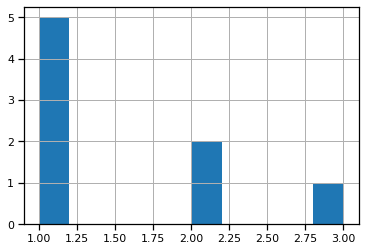

In [78]:
grades['semester'].hist()

# Visualization

Pandas is integrated with matplotlib, the main plotting module of Python.

/home/judit/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='subject'>

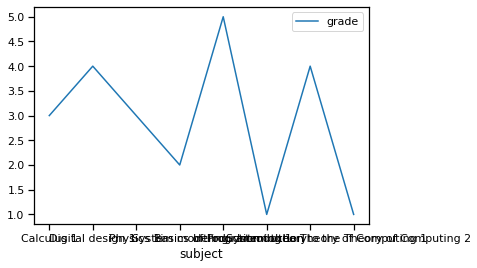

In [64]:
grades.plot(y='grade')

Or as a bar chart:

<AxesSubplot:xlabel='subject'>

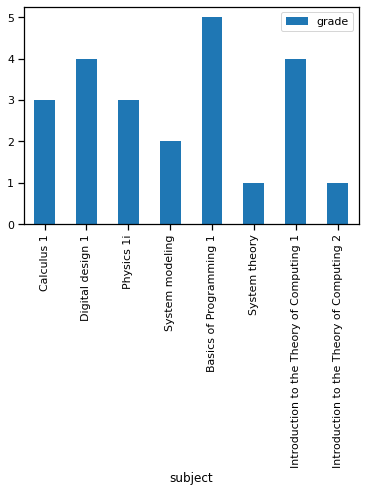

In [65]:
grades.plot(y='grade', kind='bar')

We can also specify both axes:

<AxesSubplot:xlabel='semester', ylabel='grade'>

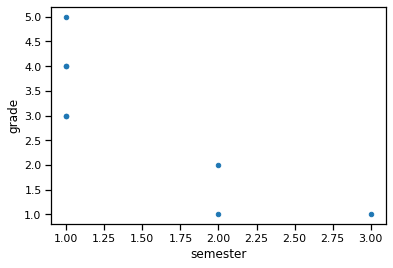

In [66]:
grades.plot(x='semester', y='grade', kind='scatter')

Combining groupby and visualization.

Plotting the grade averages by semester:

<AxesSubplot:xlabel='semester'>

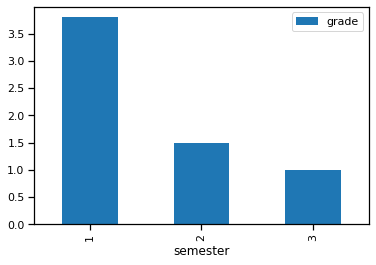

In [67]:
grades.groupby('semester').mean().plot(kind='bar')

Or the number of classes per semester:

<AxesSubplot:title={'center':'Classes per semester'}, ylabel='Classes'>

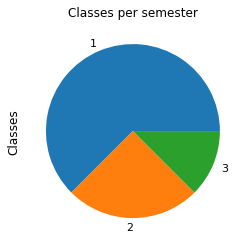

In [70]:
grades.groupby('semester').size().plot(kind='pie', title="Classes per semester", ylabel="Classes")

# GOTCHAs

Note that some operations work in a suprising way.

1. Every pandas operation returns a new Dataframe unless it's explicitly in place.
2. Jupyter outputs the return value of the last line unless it's None. This is not the same as printing.